In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import make_regression
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold, LeaveOneOut, StratifiedKFold, ShuffleSplit, GroupKFold, GroupShuffleSplit

In [2]:
data= pd.read_csv('../../Data/logement.csv', encoding = "ISO-8859-1") #importation DB

In [3]:
data.shape #Dataframe contient 20640 lignes/10 features

(20640, 10)

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
#Quelques mauvais types, changement des types des features
data['housing_median_age'] = data['housing_median_age'].astype('int')
data['total_rooms'] = data['total_rooms'].astype('int')
data['population'] = data['population'].astype('int')
data['households'] = data['households'].astype('int')
data['ocean_proximity'] = data['ocean_proximity'].astype('category')

In [8]:
data.dtypes
#Les types des features ont bien été changés.

longitude              float64
latitude               float64
housing_median_age       int32
total_rooms              int32
total_bedrooms         float64
population               int32
households               int32
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object

In [9]:
data.isna().sum()
#On a 207 valeurs nulls seulement dans une seul features : `total_bedrooms`, on ne va pas les remplacer ni les supprimer

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
data['total_bedrooms'].count

<bound method Series.count of 0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64>

In [11]:
#On supprime les lignes vides de la feature `total_bedrooms`
data = data[~data['total_bedrooms'].isnull()]

In [12]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [13]:
data['ocean_proximity'].sample(5)
#On remarque que la feature 'ocean_proximity' contient des strings nous allons donc encoder cette colonne afin de la placer en catégorie avec des chiffres

1804     NEAR BAY
7308    <1H OCEAN
4416    <1H OCEAN
3300       INLAND
4780    <1H OCEAN
Name: ocean_proximity, dtype: category
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [14]:

#ohe = OneHotEncoder(sparse=False)
#result = ohe.fit_transform(data[["ocean_proximity"]].values)

#ocean_proximity_df = pd.DataFrame(result, columns=ohe.get_feature_names(['ocean_proximity']))

#df = pd.concat([data, ocean_proximity_df], axis=1)

#ocean_proximity_df

data["ocean_proximity"] = data["ocean_proximity"].astype("category").cat.codes


In [15]:
#df.head()
#On a notre nouveau Dataframe avec la feature `ocean_proximity` qu'on a diviser en 5 catégories qui deviennent maintenant des features
data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5245,-118.43,34.09,27,1613,200.0,497,197,7.9835,500001.0,0
1334,-121.86,38.00,16,3216,464.0,1504,453,5.2500,161700.0,1
8753,-118.36,33.82,26,5166,1313.0,2738,1239,3.3565,360800.0,0
2778,-115.73,33.35,23,1586,448.0,338,182,1.2132,30000.0,1
18495,-121.57,37.01,44,1448,393.0,1066,357,2.0625,170300.0,1


In [16]:
data.shape

(20433, 10)

On vérifie qu'il n'y a pas de valeurs nulles cela es important pour la suite de notre projet.

In [17]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Notre objectif es de prédire les valeurs médiane des maison sur la côte ouest Californienne, elle correspond a median_house_value. median_house_value est notre variable à expliquer et les autres sont des variables explicatives.

C:\Users\Moog\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


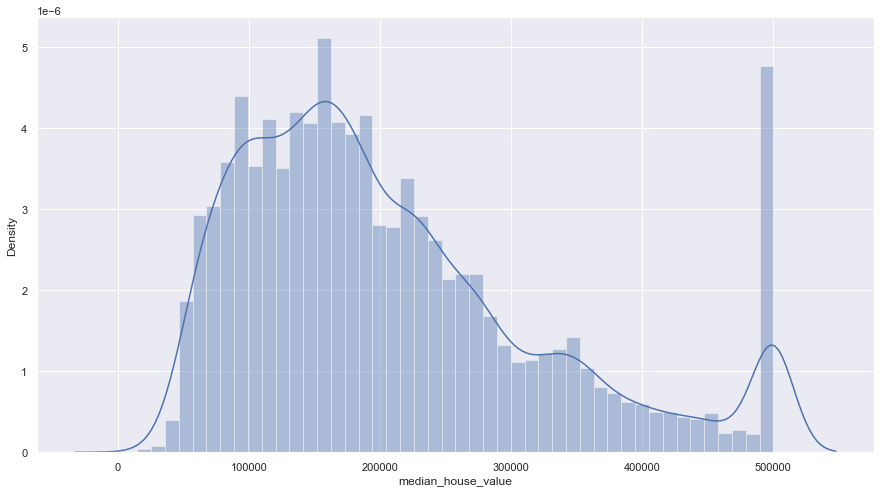

In [18]:

sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(15,8)})
_= sns.distplot(data.median_house_value.dropna()) #Visualisation du prix médian des maison californienne

In [19]:
y = data['median_house_value'].values #y correspond a la variable que l'ont veux prédire
X = data.drop(['longitude', 'latitude', 'total_bedrooms'], axis=1).values #drop des colonnes innutiles

(20433, 7)

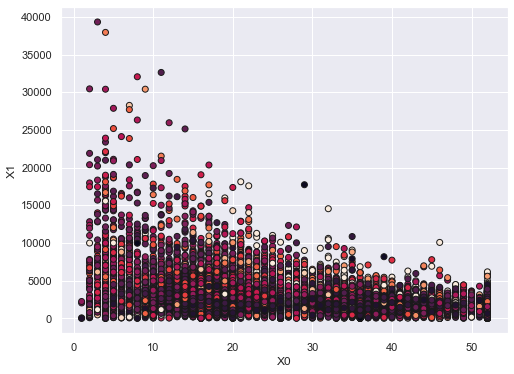

In [20]:
plt.figure(num=None, figsize=(8, 6))
plt.scatter(X[:,0], X[:, 1], marker = 'o', c=y, edgecolors='k')
plt.xlabel('X0')
plt.ylabel('X1')
X.shape 
#Nos valeurs de X repréésentés

In [21]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=0)#On sépare notre Dataframe en 2 parties afin de pouvoir l'entrainer sur la première et le tester 
print('Train set:', trainset.shape)
print('Train test:', testset.shape)

Train set: (16346, 10)
Train test: (4087, 10)


In [22]:
def preprocessing(df):
    
    X = data.drop(['longitude', 'latitude', 'total_bedrooms', 'median_house_value'], axis=1) #drop des colonnes innutiles
    y = data['median_house_value']
    
    print(y.value_counts())
    
    return X, y

In [23]:
trainset['median_house_value'].value_counts()

500001.0    772
137500.0     97
162500.0     87
112500.0     74
225000.0     72
           ... 
48900.0       1
312600.0      1
216200.0      1
394000.0      1
151000.0      1
Name: median_house_value, Length: 3624, dtype: int64

In [24]:
testset['median_house_value'].value_counts()

500001.0    186
162500.0     29
112500.0     29
187500.0     28
137500.0     22
           ... 
87000.0       1
319700.0      1
289400.0      1
182500.0      1
158600.0      1
Name: median_house_value, Length: 2160, dtype: int64

In [25]:
X_train, y_train = preprocessing(trainset)

500001.0    958
137500.0    119
162500.0    116
112500.0    103
187500.0     92
           ... 
359200.0      1
51200.0       1
39800.0       1
377600.0      1
47000.0       1
Name: median_house_value, Length: 3833, dtype: int64


In [26]:
X_test, y_test = preprocessing(testset)

500001.0    958
137500.0    119
162500.0    116
112500.0    103
187500.0     92
           ... 
359200.0      1
51200.0       1
39800.0       1
377600.0      1
47000.0       1
Name: median_house_value, Length: 3833, dtype: int64


Une fois nos 2 parties de notre dataframe créer afin d'entraîner et tester notre modele. Avant de créer celui ci on se rend compte qu’on a 13 variables explicatives pour le Prix médian. Ainsi si on veut être malin on se pose les questions suivantes : dois-je choisir toutes ces variables pour mon modèle ? Quelles sont les variables qui ont une forte relation linéaire avec la variable ‘median_house_value’. Pour répondre à ces interrogations on va faire une matrice de corrélation.

<AxesSubplot:>

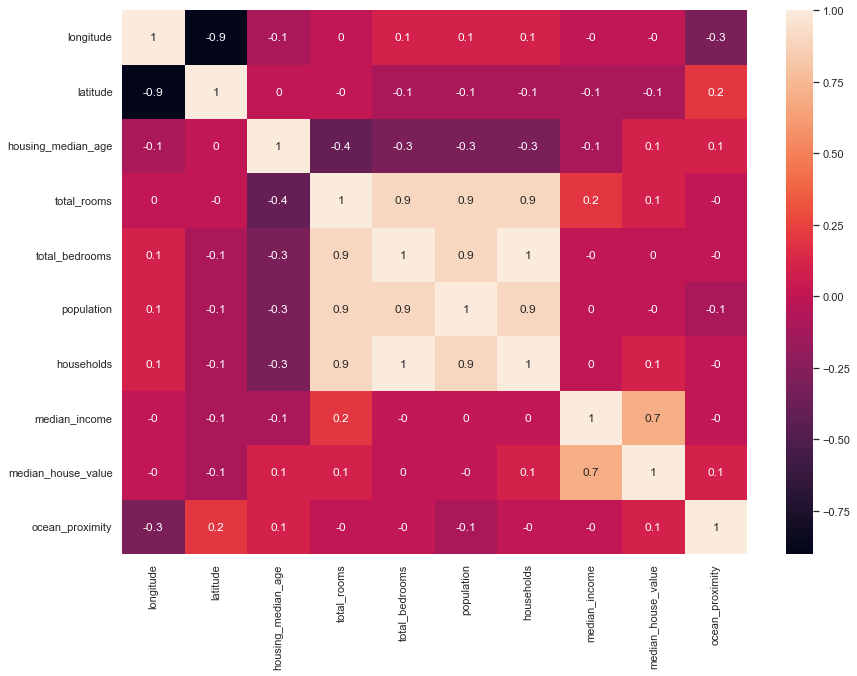

In [27]:
#etude de la correlation
matrice_corr = data.corr().round(1)
plt.subplots(figsize=(14,10))
sns.heatmap(data=matrice_corr, annot=True)

## Importation et entraînement du modèle de régression linéaire

In [26]:
from sklearn.linear_model import LinearRegression #importation du modèle
from sklearn.metrics import mean_squared_error #import d'une metric pour evaluer notre modèle
model_reg_lin = LinearRegression() #On commence avec un modele de Regression Linéaire

In [27]:
model_reg_lin.fit(X_train, y_train) #entraînement du modèle

LinearRegression()

## Évaluation du modèle de régression linéaire

On utilise deux métriques pour l’évaluation L’erreur quadratique moyenne (l’erreur d’estimation) et le R-square (la qualité du modèle de régression)

In [28]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = model_reg_lin.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)


print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

print('\n')

# model evaluation for testing set
y_test_predict = model_reg_lin.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)


print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))


La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 5.348905856536443e-11
le score R2 est 1.0


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5.393137217278599e-11
le score R2 est 1.0


On remarque que nous obtenons un score de 100% avec ce modèle ce qui paraît étrange.. Nous allons donc étudiez différent modèles.

## Importation et entraînement d'un modèle de régression logistique

In [29]:
from sklearn.linear_model import LogisticRegression #importation du modèle
from sklearn.metrics import mean_squared_error #import d'une metric pour evaluer notre modèle
model_reg_log = LogisticRegression(random_state = 0, solver = 'liblinear', multi_class = 'auto') #On commence avec un modele de Regression Logistique

In [30]:
model_reg_log.fit(X_train, y_train)

C:\Users\Moog\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(random_state=0, solver='liblinear')

## Évaluation du modèle de régression logistique

On utilise deux métriques pour l’évaluation L’erreur quadratique moyenne (l’erreur d’estimation) et le R-square (la qualité du modèle de régression)

In [31]:
# Evaluation du training set
y_train_predict = model_reg_log.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
score_r2 = r2_score(y_train, y_train_predict) 

print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 du modèle est {}'.format(score_r2))

print('\n')

# model evaluation for testing set
y_test_predict = model_reg_log.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
score_r2 = r2_score(y_train, y_train_predict) 

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 du modèle est {}'.format(score_r2))


La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 199781.1697433399
le score R2 du modèle est -2.00809600499702


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 197391.30791272127
le score R2 du modèle est -2.00809600499702


Nous avons tester 2 modèle de régréssion nous allons maintenant essayez avec d'autres modèles de prédictions et nous créer des fonctions qui nous permettrons d'aller plus vite dans cette tâche afin de trouver le modèle d'apprentissage avec ses paramètres qui es le plus précis et optimisé en vue de prédire les prix des maisons sur la côte Californienne. Cela va se faire en plusieurs procédure, une évaluation, une modélisation ainsi qu'une optimisation.

## Procédure d'évaluation

In [28]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [29]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

## Modélisation

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [32]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

Nous choisissons 4 nouveaux modèles de prédictions.

In [33]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [40]:
dict_of_models = {
                  'SVM': SVM,
                 }

In [41]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

SVM


Au vue de ces résultats nous allons nous tourner vers un modèle SVM qui obtiens un meilleur score si on regarde la courbe de train_score et validation_score (il faut qu'il y ait le moins de distance entre elles)

## Optimisation

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
SVM

In [ ]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)}

In [ ]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
evaluation(grid.best_estimator_)

Nous avons utilisé un GridSearchCV afin de trouver les meilleurs paramètre puis on ré-évalue ce modèle!

## Precision Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

In [ ]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [ ]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [ ]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)

Voici notre score finale avec le meilleur modèle pour notre dataset et notre objectif grâce a ces hyperparamètres. Pour ce dataset, une Régréssion Linéaire aurait été une bonne alternative de modèle également au vue du score plus haut.